In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
from datetime import datetime, date
from dateutil import tz
import glob
from shapely.geometry import shape, Polygon
from decimal import Decimal
import json
import itertools


In [10]:
ugc_county = geopandas.read_file('../c_10nv20/c_10nv20.shp')

ugc_county

,STATE,CWA,COUNTYNAME,FIPS,TIME_ZONE,FE_AREA,LON,LAT,geometry
0,ME,CAR,Washington,23029,E,se,-67.6361,45.0363,"MULTIPOLYGON (((-67.93539 44.40382, -67.93643 ..."
1,GA,CHS,McIntosh,13191,E,se,-81.2646,31.5329,"MULTIPOLYGON (((-81.46814 31.33980, -81.46747 ..."
2,GA,CHS,Liberty,13179,E,se,-81.2103,31.7093,"POLYGON ((-81.30807 31.79454, -81.30546 31.791..."
3,AS,PPG,Swains Island,60040,S,None,-171.0459,-11.0843,"POLYGON ((-171.04049 -11.08245, -171.03940 -11..."
4,AS,PPG,Manu'a,60020,S,None,-169.5060,-14.2219,"MULTIPOLYGON (((-169.42766 -14.21181, -169.427..."
...,...,...,...,...,...,...,...,...,...
3318,VA,AKQ,York,51199,E,se,-76.5637,37.2371,"POLYGON ((-76.71140 37.36571, -76.70710 37.365..."
3319,TX,BRO,Kenedy,48261,C,ds,-97.7174,26.9281,"MULTIPOLYGON (((-97.31581 26.60280, -97.31620 ..."
3320,TX,BRO,Willacy,48489,C,ds,-97.6732,26.4706,"MULTIPOLYGON (((-97.44247 26.37530, -97.44263 ..."
3321,MI,APX,Chippewa,26033,E,ee,-84.5921,46.3031,"MULTIPOLYGON (((-83.56822 45.92122, -83.56780 ..."


In [3]:
alert = {"id": "https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.593e0ea1951d45edca216071d770d68577bb2e1c.001.1",
      "type": "Feature",
      "geometry": None,
      "properties": {
        "@id": "https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.593e0ea1951d45edca216071d770d68577bb2e1c.001.1",
        "@type": "wx:Alert",
        "id": "urn:oid:2.49.0.1.840.0.593e0ea1951d45edca216071d770d68577bb2e1c.001.1",
        "areaDesc": "Coffee, AL; Dale, AL; Geneva, AL; Henry, AL; Houston, AL; Holmes, FL; Jackson, FL; Walton, FL; Washington, FL; Baker, GA; Ben Hill, GA; Berrien, GA; Brooks, GA; Calhoun, GA; Clay, GA; Colquitt, GA; Cook, GA; Decatur, GA; Dougherty, GA; Early, GA; Grady, GA; Irwin, GA; Lanier, GA; Lee, GA; Lowndes, GA; Miller, GA; Mitchell, GA; Quitman, GA; Randolph, GA; Seminole, GA; Terrell, GA; Thomas, GA; Tift, GA; Turner, GA; Worth, GA",
        "geocode": {
          "SAME": [
            "001031",
            "001045",
            "001061",
            "001067",
            "001069",
            "012059",
            "012063",
            "012131",
            "012133",
            "013007",
            "013017",
            "013019",
            "013027",
            "013037",
            "013061",
            "013071",
            "013075",
            "013087",
            "013095",
            "013099",
            "013131",
            "013155",
            "013173",
            "013177",
            "013185",
            "013201",
            "013205",
            "013239",
            "013243",
            "013253",
            "013273",
            "013275",
            "013277",
            "013287",
            "013321"
          ],
          "UGC": [
            "ALC031",
            "ALC045",
            "ALC061",
            "ALC067",
            "ALC069",
            "FLC059",
            "FLC063",
            "FLC131",
            "FLC133",
            "GAC007",
            "GAC017",
            "GAC019",
            "GAC027",
            "GAC037",
            "GAC061",
            "GAC071",
            "GAC075",
            "GAC087",
            "GAC095",
            "GAC099",
            "GAC131",
            "GAC155",
            "GAC173",
            "GAC177",
            "GAC185",
            "GAC201",
            "GAC205",
            "GAC239",
            "GAC243",
            "GAC253",
            "GAC273",
            "GAC275",
            "GAC277",
            "GAC287",
            "GAC321"
          ]
        },
        "affectedZones": [
          "https://api.weather.gov/zones/county/ALC031",
          "https://api.weather.gov/zones/county/ALC045",
          "https://api.weather.gov/zones/county/ALC061",
          "https://api.weather.gov/zones/county/ALC067",
          "https://api.weather.gov/zones/county/ALC069",
          "https://api.weather.gov/zones/county/FLC059",
          "https://api.weather.gov/zones/county/FLC063",
          "https://api.weather.gov/zones/county/FLC131",
          "https://api.weather.gov/zones/county/FLC133",
          "https://api.weather.gov/zones/county/GAC007",
          "https://api.weather.gov/zones/county/GAC017",
          "https://api.weather.gov/zones/county/GAC019",
          "https://api.weather.gov/zones/county/GAC027",
          "https://api.weather.gov/zones/county/GAC037",
          "https://api.weather.gov/zones/county/GAC061",
          "https://api.weather.gov/zones/county/GAC071",
          "https://api.weather.gov/zones/county/GAC075",
          "https://api.weather.gov/zones/county/GAC087",
          "https://api.weather.gov/zones/county/GAC095",
          "https://api.weather.gov/zones/county/GAC099",
          "https://api.weather.gov/zones/county/GAC131",
          "https://api.weather.gov/zones/county/GAC155",
          "https://api.weather.gov/zones/county/GAC173",
          "https://api.weather.gov/zones/county/GAC177",
          "https://api.weather.gov/zones/county/GAC185",
          "https://api.weather.gov/zones/county/GAC201",
          "https://api.weather.gov/zones/county/GAC205",
          "https://api.weather.gov/zones/county/GAC239",
          "https://api.weather.gov/zones/county/GAC243",
          "https://api.weather.gov/zones/county/GAC253",
          "https://api.weather.gov/zones/county/GAC273",
          "https://api.weather.gov/zones/county/GAC275",
          "https://api.weather.gov/zones/county/GAC277",
          "https://api.weather.gov/zones/county/GAC287",
          "https://api.weather.gov/zones/county/GAC321"
        ],
        "references": [],
        "sent": "2021-04-24T06:22:00-04:00",
        "effective": "2021-04-24T06:22:00-04:00",
        "onset": "2021-04-24T06:22:00-04:00",
        "expires": "2021-04-24T15:00:00-04:00",
        "ends": "2021-04-24T15:00:00-04:00",
        "status": "Actual",
        "messageType": "Alert",
        "category": "Met",
        "severity": "Extreme",
        "certainty": "Possible",
        "urgency": "Future",
        "event": "Tornado Watch",
        "sender": "w-nws.webmaster@noaa.gov",
        "senderName": "NWS Tallahassee FL",
        "headline": "Tornado Watch issued April 24 at 6:22AM EDT until April 24 at 3:00PM EDT by NWS Tallahassee FL",
        "description": "THE NATIONAL WEATHER SERVICE HAS ISSUED TORNADO WATCH 106 IN\nEFFECT UNTIL 3 PM EDT /2 PM CDT/ THIS AFTERNOON FOR THE FOLLOWING\nAREAS\n\nIN ALABAMA THIS WATCH INCLUDES 5 COUNTIES\n\nIN SOUTHEAST ALABAMA\n\nCOFFEE                DALE                  GENEVA\nHENRY                 HOUSTON\n\nIN FLORIDA THIS WATCH INCLUDES 4 COUNTIES\n\nIN PANHANDLE FLORIDA\n\nHOLMES                JACKSON               WALTON\nWASHINGTON\n\nIN GEORGIA THIS WATCH INCLUDES 26 COUNTIES\n\nIN SOUTH CENTRAL GEORGIA\n\nBEN HILL              BERRIEN               BROOKS\nCOLQUITT              COOK                  IRWIN\nLANIER                LOWNDES               THOMAS\nTIFT                  TURNER                WORTH\n\nIN SOUTHWEST GEORGIA\n\nBAKER                 CALHOUN               CLAY\nDECATUR               DOUGHERTY             EARLY\nGRADY                 LEE                   MILLER\nMITCHELL              QUITMAN               RANDOLPH\nSEMINOLE              TERRELL\n\nTHIS INCLUDES THE CITIES OF ABBA, ABBEVILLE,\nABBEVILLE MUNICIPAL A/P, ADEL, ALBANY, ALFORDS, ALPINE HEIGHTS,\nARGYLE, ARLINGTON, ASBURY, ASHBURN, ASHTON, AUSMAC, BABCOCK,\nBAGBY STATE PARK, BAINBRIDGE, BANNOCKBURN, BARKER STORE,\nBARNEYVILLE, BATTENS CROSSROADS, BEACHTON, BEAMON, BELLVIEW,\nBENEVOLENCE, BERRIEN CO A/P, BLACKWELL FIELD A/P, BLACKWOOD,\nBLAKELY, BLUE SPRINGS, BONIFAY, BOWENS MILL, BOYKIN, BRANCHVILLE,\nBROOKS CO A/P, BROWNS CROSSROADS, BROWNTOWN, CAIRO, CAMILLA,\nCAPEL, CENTER RIDGE, CENTERVILLE, CHIPLEY,\nCHIPLEY MUNICIPAL AIRPORT, CHULA, CLARKS MILL, CLUSTER SPRINGS,\nCOBB CROSSROADS, COLES, COLQUITT, COMMISSARY HILL, COOK CO A/P,\nCOOKTOWN, CORDRAYS MILL, COTTLE, COTTON, COTTONWOOD, COURTHOUSE,\nCROSSROADS, CRYSTAL LAKE, CUBA, CUTHBERT, DALEVILLE, DAVIS PARK,\nDAWSON, DAWSON MUNICIPAL A/P, DAYS CROSSROADS,\nDE FUNIAK SPRING AIRPORT, DE FUNIAK SPRINGS, DECATUR CO A/P,\nDICKEY, DILL, DILLON, DIXIE, DONALDSONVILLE A/P, DONALSONVILLE,\nDOTHAN, DOUGLASVILLE, DOVEREL, EARLY CO A/P, EAST ALBANY, EDISON,\nELMODEL WMA, ELPINO, EMPRESS, ENTERPRISE, ENTERPRISE,\nENTERPRISE MUNICIPAL A/P, EUCHEEANNA, EWELL, FADETTE, FAIRCHILD,\nFITZGERALD, FITZGERALD MUNICIPAL A/P, FIVE POINTS, FORRESTER,\nFORT GAINES, FORT RUCKER, GAMMAGE, GANER, GENEVA,\nGENEVA MUNICIPAL A/P, GEORGETOWN, GORDY, GRACEVILLE,\nGRADY CO A/P, GRAVES, GREGGS, GROOVERVILLE, HACODA, HANOVER,\nHARDING, HARTFORD, HATCHER, HAWKINSTOWN, HEADLAND,\nHEADLAND MUNICIPAL A/P, HEROD, HOBBY, HOGGARD MILL,\nHOLMES COUNTY AIRPORT, IRWINVILLE, ISABELLA, IVEYS MILL,\nJONES CROSSING, KEYTON, LACONTE, LAKELAND, LAWRENCEVILLE,\nLEESBURG, LEONIA, LITTLE HOPE, LOCKETT CROSSING,\nLOGAN FIELD MUNICIPAL A/P, LYNN, MABSON, MALONE, MARIANNA,\nMASSEE, MAYHAW, METCALF, MILFORD, MITCHELL CO A/P, MONCRIEF,\nMOORES CROSSROADS, MORGAN, MOULTRIE, MOULTRIE MUNICIPAL A/P,\nNANKIN, NASHVILLE, NEW HOPE, NEWTON, OCILLA, ORANGE HILL, OZARK,\nPALMYRA, PASCO, PECAN, PELHAM, PETERSON HILL, PINE PARK,\nPINE VALLEY, POPLAR HEAD, PRETORIA, QUEENSLAND, QUITMAN,\nRED ROCK, RED STORE CROSSROADS, RICHTER CROSSROADS, RICKS PLACE,\nRIVERTURN, SCREAMER, SEMINOLE STATE PARK, SHIVERS MILL,\nSIMSVILLE, SMITHVILLE, SNEADS, SOUTHWEST GA REGIONAL A/P,\nSPENCE AIRPORT, SPRINGVALE, SPRINGVALE STATION, STEINHAM STORE,\nSUNSWEET, SYLVESTER, SYLVESTER AIRPORT, TEETERVILLE, THOMASVILLE,\nTIFTON, TURNER CITY, UNION, VALDOSTA, VALDOSTA REGIONAL AIRPORT,\nWALKER, WATERLOO, WEBER, WEST BAINBRIDGE, WESTWOOD, WILLIAMSBURG,\nWIRE BRIDGE, WORTH, AND YEOMANS.",
        "instruction": "",
        "response": "Monitor",
        "parameters": {
          "PIL": [
            "TAEWCNTAE"
          ],
          "BLOCKCHANNEL": [
            "EAS",
            "NWEM",
            "CMAS"
          ],
          "EAS-ORG": [
            "WXR"
          ],
          "VTEC": [
            "/O.NEW.KTAE.TO.A.0106.210424T1022Z-210424T1900Z/"
          ],
          "eventEndingTime": [
            "2021-04-24T19:00:00+00:00"
          ]
        }
      }
        }

In [4]:
ddb_data = json.loads(json.dumps(alert), parse_float=Decimal)
ddb_data

{'id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.593e0ea1951d45edca216071d770d68577bb2e1c.001.1',
 'type': 'Feature',
 'geometry': None,
 'properties': {'@id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.593e0ea1951d45edca216071d770d68577bb2e1c.001.1',
  '@type': 'wx:Alert',
  'id': 'urn:oid:2.49.0.1.840.0.593e0ea1951d45edca216071d770d68577bb2e1c.001.1',
  'areaDesc': 'Coffee, AL; Dale, AL; Geneva, AL; Henry, AL; Houston, AL; Holmes, FL; Jackson, FL; Walton, FL; Washington, FL; Baker, GA; Ben Hill, GA; Berrien, GA; Brooks, GA; Calhoun, GA; Clay, GA; Colquitt, GA; Cook, GA; Decatur, GA; Dougherty, GA; Early, GA; Grady, GA; Irwin, GA; Lanier, GA; Lee, GA; Lowndes, GA; Miller, GA; Mitchell, GA; Quitman, GA; Randolph, GA; Seminole, GA; Terrell, GA; Thomas, GA; Tift, GA; Turner, GA; Worth, GA',
  'geocode': {'SAME': ['001031',
    '001045',
    '001061',
    '001067',
    '001069',
    '012059',
    '012063',
    '012131',
    '012133',
    '013007',
    '013017',
  

In [5]:
# Set colors
warning_cmap = {'Tornado Watch': '#FF0000'}

In [6]:
def is_ugc_county(ugcs):
    '''Determines whether alert type is UGC county or UGC zone'''
    return True if ugcs[0][2] == 'C' else False

In [7]:
def ugc_county_geography(ugcs):
    '''Returns latitudes and longitudes from UGC county-based alerts'''
    counties = [int(ugc[-3:]) for ugc in ugcs]
    state = [ugc[0:2] for ugc in ugcs]

    latitudes = []
    longitudes = []
    geometries = []
    
    for idx, ugc in enumerate(counties):
        latitude = ugc_county.loc[(
            ugc_county['STATE'] == state[idx]) & (
            ugc_county['FIPS'].astype(int) % 1000 == ugc)]['LAT'].tolist()
        longitude = ugc_county.loc[(
            ugc_county['STATE'] == state[idx]) & (
            ugc_county['FIPS'].astype(int) % 1000 == ugc)]['LON'].tolist()
        geometry = ugc_county.loc[(
            ugc_county['STATE'] == state[idx]) & (ugc_county['FIPS'].astype(int) % 1000 == ugc)]['geometry']
        latitudes.append(latitude)
        longitudes.append(longitude)
        geometries.append(geometry)
        
    flatten = itertools.chain.from_iterable
    latitudes = list(flatten(latitudes))
    longitudes = list(flatten(longitudes))

    return latitudes, longitudes, geometries

In [8]:
def calculate_ugc_geography(alert):
    ugcs = alert['properties']['geocode']['UGC']

    if is_ugc_county(ugcs):
        latitudes, longitudes, geometries = ugc_county_geography(ugcs)
    else:
        latitudes, longitudes, geometries = ugc_zone_geography(ugcs)
    
    return {
        'west_bound': min(longitudes),
        'south_bound': min(latitudes),
        'east_bound': max(longitudes),
        'north_bound': max(latitudes),
        'polygon': geometries
    }

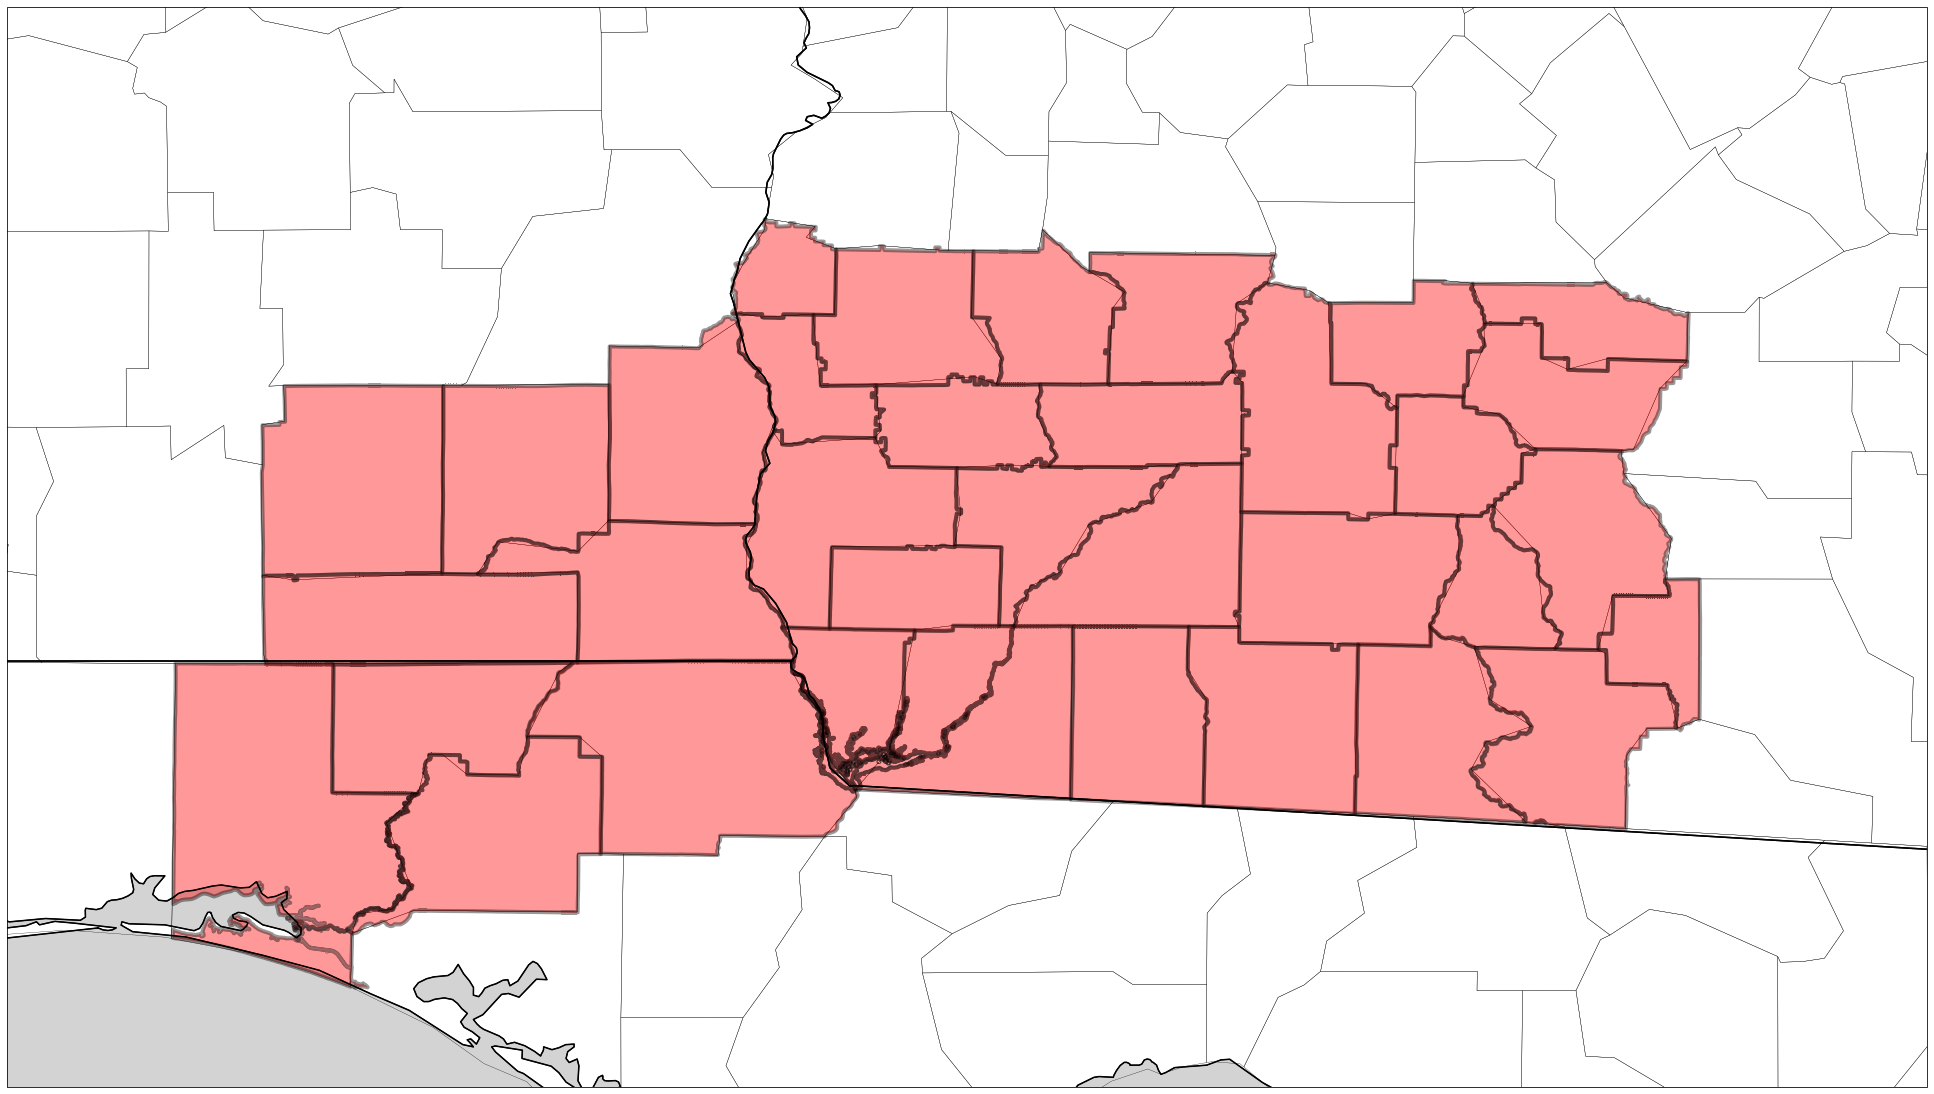

In [12]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

data_crs = ccrs.PlateCarree()

alert_map_info = (
    convert_geojson_to_geopandas_df(alert) if alert['geometry'] 
    else calculate_ugc_geography(alert))


ax.set_extent([alert_map_info['west_bound'] - 0.5, alert_map_info['east_bound'] + 0.5, 
                   alert_map_info['south_bound'] - 0.5, alert_map_info['north_bound'] + 0.6], data_crs)
ax.set_adjustable('datalim')

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5, zorder=10)

# Plot alerts on the map
for key in warning_cmap.keys():
    if key == alert['properties']['event'] and alert['geometry']:
        ax.add_geometries(alert_map_info['polygon'], crs=data_crs, facecolor=warning_cmap[key],
                          edgecolor='black', linewidth=4, zorder=6, alpha=0.04)
    elif key == alert['properties']['event'] and not alert['geometry']:
        for polys in alert_map_info['polygon']:
            ax.add_geometries(polys, crs=data_crs, facecolor=warning_cmap[key], edgecolor='black',
                              linewidth=4,  alpha=0.4, zorder=6)
    else:
        continue
    
plt.savefig('new.png')